In [47]:
'''
This script includes subdivisions for
Ukraine, Kosovo, Moldova and Bosnia Herzegovina
in the regular NUTS 2021 geojson.
'''

import geopandas as gpd
import pandas as pd

def standardize_columns(geometries, assigned_level):
        
    geometries['NUTS_ID'] = geometries['id']
    geometries['LEVL_CODE'] = assigned_level
    geometries['CNTR_CODE'] = geometries['NUTS_ID'].str[:3]
    geometries['NAME_LATN'] = geometries['name']
    geometries['NUTS_NAME'] = geometries['name']
    
    geometries = geometries.drop(columns=["name"])
    
    return geometries


def main():
    
    # Original nuts file
    nuts = gpd.read_file("../data/NUTS/nuts-2021.geojson")

    ### We will treat the always treat the smallest division available as level 3,

    # Ukraine has divisions equivalent to NUTS 0, 2 and 3
    ukr_0 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Ukraine/UKR_N0.geojson")
    ukr_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Ukraine/UKR_N3.geojson")
    
    # Fixes unknown ukraine division
    ukr_3.id = ukr_3.id.str.replace("?", "UKR.xxx")
    ukr_3.name = ukr_3.name.str.replace("?", "Unknown name Ukraine division")

    # Kosovo has divisions equivalent to NUTS 0, 2
    kos_0 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Kosovo/XKO_N0.geojson")
    kos_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Kosovo/XKO_N2.geojson")

    # Bosnia and Herzegovina has divisions equivalent to nuts 0, 2 and 3
    bos_0 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Bosnia/BIH_N0.geojson")
    bos_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Bosnia/BIH_N3.geojson")

    # Moldova has divisions equivalent to NUTS 0 and 2
    mol_0 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Moldova/MDA_N0.geojson")
    mol_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Moldova/MDA_N2.geojson")

    level_0 = [ukr_0, kos_0, bos_0, mol_0]
    level_3 = [ukr_3, kos_3, bos_3, mol_3]
    
    ### Now we will standardize column names
    for geometries in level_0:
        geometries = standardize_columns(geometries, 0)
    for geometries in level_3:
        geometries = standardize_columns(geometries, 3)  
        
   
    ### We will also remove the other levels from the general nuts file
    nuts = nuts[nuts.LEVL_CODE.isin([0, 3])].reset_index(drop=True)
    
    ### And finally concatenate all
    nuts = pd.concat([nuts] + level_0 + level_3, ignore_index=True)
    
    nuts.to_file("../output/NUTS/expanded-NUTS.json", driver='GeoJSON')

if __name__ == "__main__":
    main()

In [65]:
    ukr_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Ukraine/UKR_N3.geojson")
    
    # Fixes unknown ukraine division
    ukr_3.id = ukr_3.id.str.replace("?", "Unknown")
    ukr_3.name = ukr_3.name.str.replace("?", "Unknown")

/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_22466/3043466124.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ukr_3.id = ukr_3.id.str.replace("?", "Unknown")
/var/folders/52/vy6xx2q911l7rd368b7ngb8w0000gn/T/ipykernel_22466/3043466124.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ukr_3.name = ukr_3.name.str.replace("?", "Unknown")


In [66]:
ukr_3

,id,name,geometry
0,Unknown,Unknown,"MULTIPOLYGON (((30.59167 50.41236, 30.60611 50..."
1,UKR.1.1_1,Cherkas'ka,"MULTIPOLYGON (((32.17150 49.43881, 32.16858 49..."
2,UKR.1.2_1,Cherkas'kyi,"MULTIPOLYGON (((32.03880 49.49877, 32.02555 49..."
3,UKR.1.3_1,Chornobaivs'kyi,"MULTIPOLYGON (((32.17150 49.43881, 32.17080 49..."
4,UKR.1.4_1,Chyhyryns'kyi,"MULTIPOLYGON (((32.26144 49.20893, 32.27050 49..."
...,...,...,...
624,UKR.27.24_1,Ruzhyns'kyi,"MULTIPOLYGON (((29.46955 49.81223, 29.46984 49..."
625,UKR.27.25_1,Volodars'ko-Volyns'kyi,"MULTIPOLYGON (((28.84474 50.68081, 28.82550 50..."
626,UKR.27.26_1,Zhytomyrs'ka,"MULTIPOLYGON (((28.70895 50.31022, 28.73090 50..."
627,UKR.27.27_1,Zhytomyrs'kyi,"MULTIPOLYGON (((29.05904 50.18084, 29.04076 50..."


,id,name,geometry
0,XKO.1_1,Đakovica,"POLYGON ((20.45872 42.26434, 20.44279 42.27199..."
1,XKO.2_1,Gnjilane,"POLYGON ((21.47699 42.26022, 21.47856 42.24297..."
2,XKO.3_1,Kosovska Mitrovica,"POLYGON ((20.90418 42.70115, 20.89720 42.69841..."
3,XKO.4_1,Pećki,"POLYGON ((20.49999 42.51408, 20.49920 42.51612..."
4,XKO.5_1,Pristina,"POLYGON ((21.29219 42.55119, 21.29004 42.55103..."
5,XKO.6_1,Prizren,"POLYGON ((20.59294 41.88304, 20.59007 41.89232..."
6,XKO.7_1,Uroševac,"POLYGON ((21.26187 42.32405, 21.26328 42.32486..."


In [63]:
ukr_3 = gpd.read_file("../data/NUTS/geometries_BIH_XKO_MDA_UKR/Ukraine/UKR_N2.geojson")


/Users/menegat/opt/anaconda3/envs/climate-crisis-forecast/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


,id,name,geometry
0,?,?,"MULTIPOLYGON (((30.59167 50.41236, 30.60611 50..."
1,UKR.1_1,Cherkasy,"MULTIPOLYGON (((30.94024 48.75866, 30.92243 48..."
2,UKR.2_1,Chernihiv,"MULTIPOLYGON (((31.42854 50.50745, 31.41903 50..."
3,UKR.3_1,Chernivtsi,"MULTIPOLYGON (((24.93478 47.72813, 24.93280 47..."
4,UKR.4_1,Crimea,"MULTIPOLYGON (((34.30819 44.55320, 34.30819 44..."
5,UKR.5_1,Dnipropetrovs'k,"MULTIPOLYGON (((33.89692 47.48507, 33.88821 47..."
6,UKR.6_1,Donets'k,"MULTIPOLYGON (((37.47097 47.02431, 37.47097 47..."
7,UKR.7_1,Ivano-Frankivs'k,"MULTIPOLYGON (((24.89385 47.72483, 24.88742 47..."
8,UKR.8_1,Kharkiv,"MULTIPOLYGON (((36.15281 48.70864, 36.15328 48..."
9,UKR.9_1,Kherson,"MULTIPOLYGON (((32.03319 46.17569, 32.03319 46..."


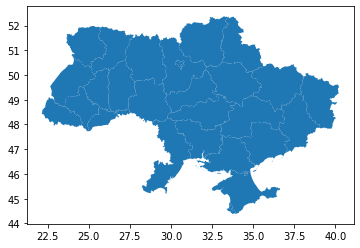

In [64]:
ax = ukr_3.plot()
ukr_3